In [1]:
import torch
import torch.nn as nn
import torch.optim as optim

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import MinMaxScaler


import plotly.graph_objects as go

from tqdm import tqdm


import warnings
warnings.filterwarnings('ignore')

color_list_=['tab:blue','tab:orange','tab:green','tab:red','tab:purple','tab:brown','tab:olive','tab:cyan']


In [2]:
data = pd.read_parquet('./Data/FullData.parquet')

In [3]:
numbers = ['293532', '307328', '307326']
data = data.loc[data.RunNumber.isin(numbers)]

In [4]:
print(data.shape)
data.head()

(1609728, 15)


,ChannelID,ChipID,Sector,ChannelNumber,Signal,CMSubstracted,ChipMean,ChipSigma,Staves,Rows,PedestalValue,Sigma,STD,SensorType,RunNumber
0,4194304,Chip0,UTaX_1CB_S4,Ch0,0.029467,0.918810,-0.11862,1.04342,1C,S4B,-7,-7.12525,1.55569,A,293532
1,4194305,Chip0,UTaX_1CB_S4,Ch1,0.203336,0.715657,-0.11862,1.04342,1C,S4B,-7,-6.75779,1.21160,A,293532
2,4194306,Chip0,UTaX_1CB_S4,Ch2,0.102181,0.731728,-0.11862,1.04342,1C,S4B,-6,-5.91200,1.13765,A,293532
3,4194307,Chip0,UTaX_1CB_S4,Ch3,-0.386058,0.786628,-0.11862,1.04342,1C,S4B,-5,-5.42700,1.20610,A,293532
4,4194308,Chip0,UTaX_1CB_S4,Ch4,-0.196124,0.754681,-0.11862,1.04342,1C,S4B,-5,-5.28600,1.21664,A,293532


In [5]:
#Taking only UTaX

utax = data[data.Sector.str.startswith('UTaX')]

#Run Number is in string format
utax.RunNumber = pd.to_numeric(utax.RunNumber)

In [6]:
#Reducing the granularity to Sector Level
columns_to_include = ['Sector'] + utax.select_dtypes(exclude='object').columns.tolist()

# Aggregating the codes to Sector and Run Number
# This will provide all the required data for each sector of UTaX Plan
sector_level_data = utax[columns_to_include].groupby(['Sector','RunNumber']).mean().reset_index()

sector_level_data

,Sector,RunNumber,ChannelID,Signal,CMSubstracted,ChipMean,ChipSigma,PedestalValue,Sigma,STD
0,UTaX_1AB_M1E,293532,5254911.5,1.176758e-08,0.547003,-0.023957,0.700991,1.507812,1.522711,0.612546
1,UTaX_1AB_M1E,307326,5254911.5,2.241135e-05,0.651391,-0.148003,0.787287,-0.248047,-0.396975,0.712275
2,UTaX_1AB_M1E,307328,5254911.5,-1.012612e-04,0.605971,0.111766,0.749038,0.285156,0.400737,0.663729
3,UTaX_1AB_M1W,293532,5254399.5,-1.200488e-07,0.540727,0.163820,0.665020,2.718750,2.792046,0.604437
4,UTaX_1AB_M1W,307326,5254399.5,-4.464070e-05,0.618984,0.184502,0.715371,0.103516,0.293693,0.663907
...,...,...,...,...,...,...,...,...,...,...
739,UTaX_8CT_S2,307326,4323583.5,1.253333e-04,0.882702,-0.178846,0.957037,-0.062500,-0.248453,0.944743
740,UTaX_8CT_S2,307328,4323583.5,-1.277919e-03,0.810853,0.072671,0.933195,0.121094,0.187783,0.873636
741,UTaX_8CT_S3,293532,4324607.5,-1.149326e-04,0.858979,-0.332644,1.013548,1.689453,1.593912,1.055257
742,UTaX_8CT_S3,307326,4324607.5,-3.239334e-04,0.822134,-0.006360,0.896799,0.666016,0.658357,0.875953


In [7]:
scaler = MinMaxScaler(feature_range=(0, 1))


# Fit and transform the data
numericals_utax_scaled = pd.DataFrame(scaler.fit_transform(sector_level_data.drop('Sector',axis=1)))
numericals_utax_scaled.columns = sector_level_data.drop('Sector',axis=1).columns

In [8]:
numericals_utax_scaled

,RunNumber,ChannelID,Signal,CMSubstracted,ChipMean,ChipSigma,PedestalValue,Sigma,STD
0,0.000000,0.899652,0.345993,0.063062,0.469402,0.075157,0.792190,0.792423,0.306702
1,0.999855,0.899652,0.347010,0.242232,0.373396,0.148375,0.712044,0.704853,0.356636
2,1.000000,0.899652,0.341396,0.164272,0.574445,0.115922,0.736382,0.741242,0.332329
3,0.000000,0.899218,0.345987,0.052289,0.614732,0.044637,0.847464,0.850327,0.302642
4,0.999855,0.899218,0.343966,0.186608,0.630738,0.087357,0.728091,0.736359,0.332419
...,...,...,...,...,...,...,...,...,...
739,0.999855,0.109470,0.351682,0.639249,0.349525,0.292400,0.720514,0.711628,0.473033
740,1.000000,0.109470,0.287978,0.515929,0.544187,0.272172,0.728894,0.731528,0.437430
741,0.000000,0.110339,0.340775,0.598532,0.230493,0.340348,0.800481,0.795671,0.528367
742,0.999855,0.110339,0.331287,0.535291,0.483020,0.241292,0.753767,0.752994,0.438590


In [11]:
# Define the LSTM model
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(LSTMModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out

# Parameters
input_size = 1
hidden_size = 128
num_layers = 2
output_size = 15
num_epochs = 1000
# learning_rate = 0.001


np.random.seed(42)

data = numericals_utax_scaled['PedestalValue'].values

train_size = int(len(data) * 0.75)

train_data = data[:train_size]
test_data = data[train_size:]

train_data = np.tile(train_data, 5)


# Prepare the data
def create_sequences(data, input_len, output_len):
    xs, ys = [], []
    for i in range(len(data) - input_len - output_len + 1):
        x = data[i:i+input_len]
        y = data[i+input_len:i+input_len+output_len]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

input_len = 15
output_len = 15

x_train, y_train = create_sequences(train_data, input_len, output_len)
x_test, y_test = create_sequences(test_data, input_len, output_len)



# Convert to PyTorch tensors
x_train = torch.tensor(x_train, dtype=torch.float32).unsqueeze(-1)
y_train = torch.tensor(y_train, dtype=torch.float32)



x_test = torch.tensor(x_test, dtype=torch.float32).unsqueeze(-1) 
y_test = torch.tensor(y_test, dtype=torch.float32)

# Initialize the model, loss function, and optimizer
model = LSTMModel(input_size, hidden_size, num_layers, output_size)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters())#, lr=learning_rate)

# Training loop
for epoch in range(num_epochs):
    model.train()
    outputs = model(x_train)
    optimizer.zero_grad()
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()

    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Making predictions
model.eval()
with torch.no_grad():
    predictions = model(x_test)
    print(predictions[-1]) 


# torch.save(model,f='./Misc/Models/LSTMModel.pt')

Epoch [100/1000], Loss: 0.0060
Epoch [200/1000], Loss: 0.0060
Epoch [300/1000], Loss: 0.0060
Epoch [400/1000], Loss: 0.0060
Epoch [500/1000], Loss: 0.0060
Epoch [600/1000], Loss: 0.0060
Epoch [700/1000], Loss: 0.0060
Epoch [800/1000], Loss: 0.0060
Epoch [900/1000], Loss: 0.0060
Epoch [1000/1000], Loss: 0.0060
tensor([0.7218, 0.7219, 0.7218, 0.7221, 0.7219, 0.7218, 0.7219, 0.7219, 0.7218,
        0.7219, 0.7217, 0.7220, 0.7216, 0.7217, 0.7220])


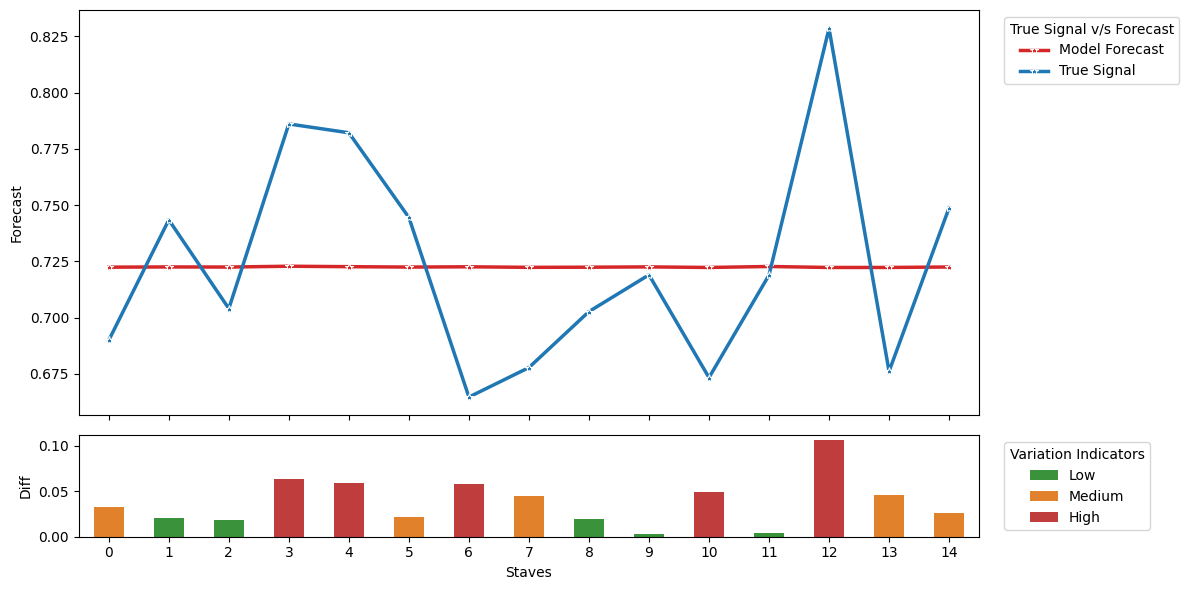

In [12]:
#Test Case
# model=torch.load(f='Misc/Models/LSTMModel.pt')
model.eval()

with torch.no_grad():
    output = model(x_test)
    
custom_colors = {'Low': 'tab:green', 'Medium': 'tab:orange', 'High': 'tab:red'}

variations = pd.DataFrame(index=np.arange(15))
variations['TrueSignal'] = y_test[0].detach().numpy()
variations['Forecast'] = output[0].detach().numpy()

variations['Diff'] = np.abs(variations['TrueSignal'] - variations['Forecast'])
variations['Alert']=pd.qcut(variations['Diff'],q=3,labels=['Low','Medium','High'])

fig, (ax1, ax2) = plt.subplots(2,1,figsize=(12,6),gridspec_kw={'height_ratios': [4, 1]},sharex=True)
sns.lineplot(variations['Forecast'],marker='*',label='Model Forecast',linewidth=2.5,color='tab:red',ax=ax1)
sns.lineplot(variations['TrueSignal'],marker='*',label='True Signal',linewidth=2.5,color='tab:blue',ax=ax1)


sns.barplot(data=variations, x=variations.index, y='Diff', hue='Alert',width=0.5,palette=custom_colors,ax=ax2)

ax1.legend(loc='upper left', bbox_to_anchor=(1.02, 1.0), title='True Signal v/s Forecast')
ax2.legend(loc='upper left', bbox_to_anchor=(1.02, 1.0), title='Variation Indicators')

plt.xlabel('Staves')
plt.tight_layout()
plt.show()




In [13]:
# model=torch.load(f='Misc/Models/LSTMModel.pt')
model.eval()

def variation_plot(data,filename):
    with torch.no_grad():
        output = model(data.reshape(1,15,1))

    custom_colors = {'Low': 'tab:green', 'Medium': 'tab:orange', 'High': 'tab:red'}

    variations = pd.DataFrame(index=np.arange(15))
    variations['TrueSignal'] = data.detach().numpy()
    variations['Forecast'] = output[0].detach().numpy()


    variations['Abs. Difference'] = np.abs(variations['TrueSignal'] - variations['Forecast'])
    variations['Alert']=pd.cut(variations['Abs. Difference'],bins=[0, 0.25, 0.5,1],labels=['Low','Medium','High'])

    fig, (ax1, ax2) = plt.subplots(2,1,figsize=(12,6),gridspec_kw={'height_ratios': [4, 1]},sharex=True)
    sns.lineplot(variations['Forecast'],marker='*',label='Model Forecast',linewidth=2.5,color='tab:red',ax=ax1)
    sns.lineplot(variations['TrueSignal'],marker='*',label='True Signal',linewidth=2.5,color='tab:blue',ax=ax1)
    

    sns.barplot(data=variations, x=variations.index, y='Abs. Difference', hue='Alert',width=0.5,palette=custom_colors,ax=ax2)

    ax1.legend(loc='upper left', bbox_to_anchor=(1.02, 1.0), title='True Signal v/s Forecast')
    ax2.legend(loc='upper left', bbox_to_anchor=(1.02, 1.0), title='Variation Indicators')

    ax1.set(ylim=(0, 1))
    ax1.set_ylabel('True Signal - Forecasted Signal')
    ax2.set(ylim=(0, 1))

    plt.xlabel('Staves')
    plt.tight_layout()
    

    # plt.savefig(filename)

    # print("Image Processed and Saved.!")
    plt.show()



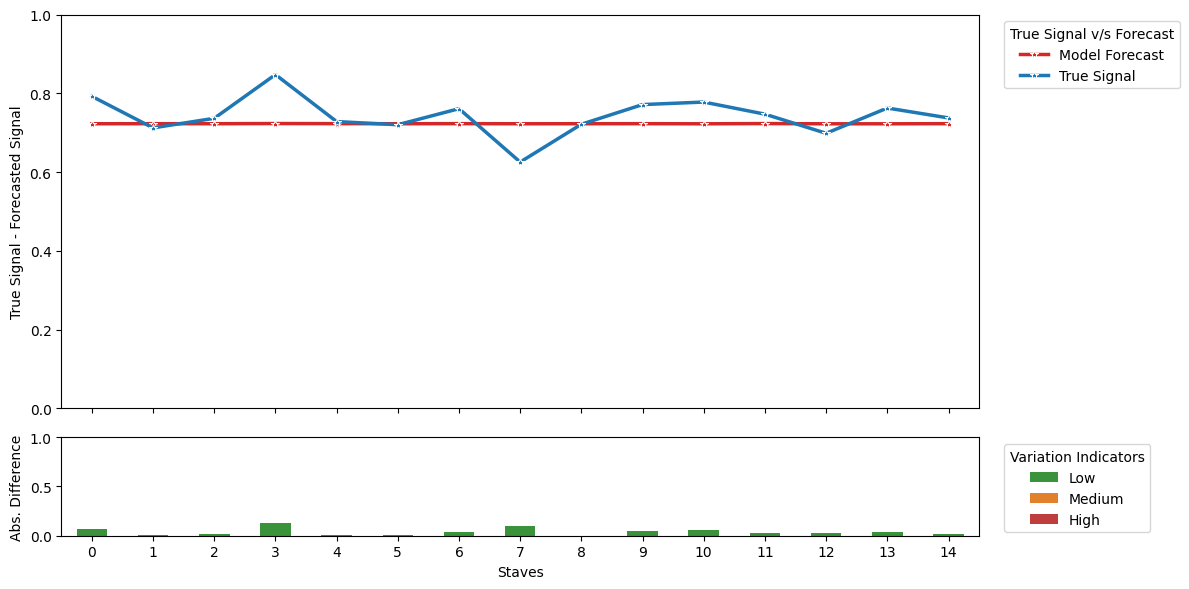

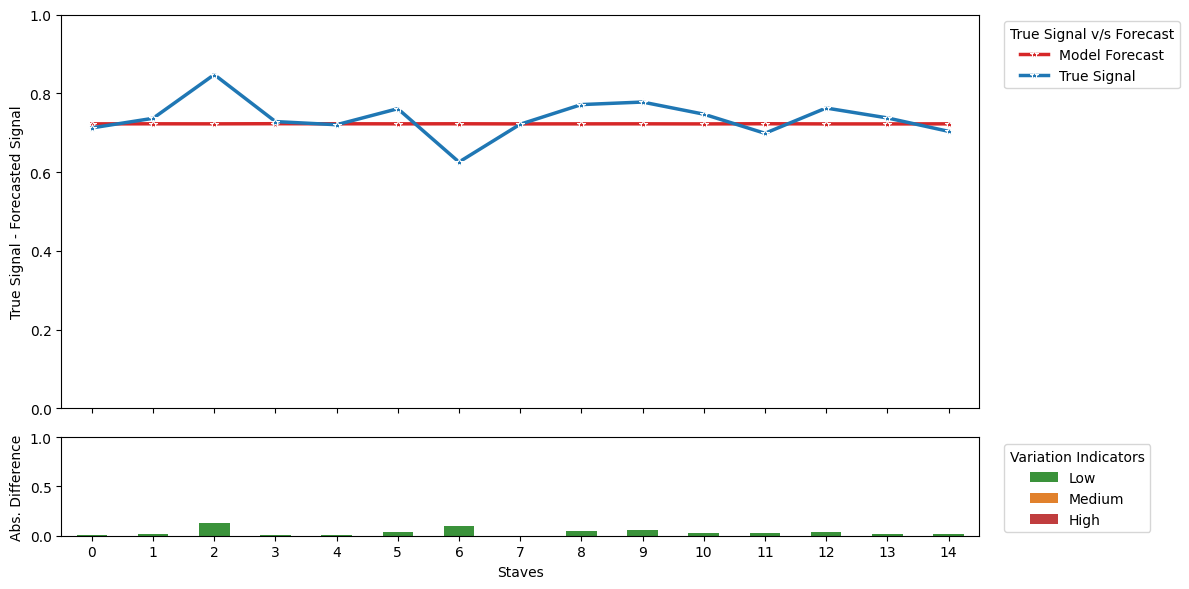

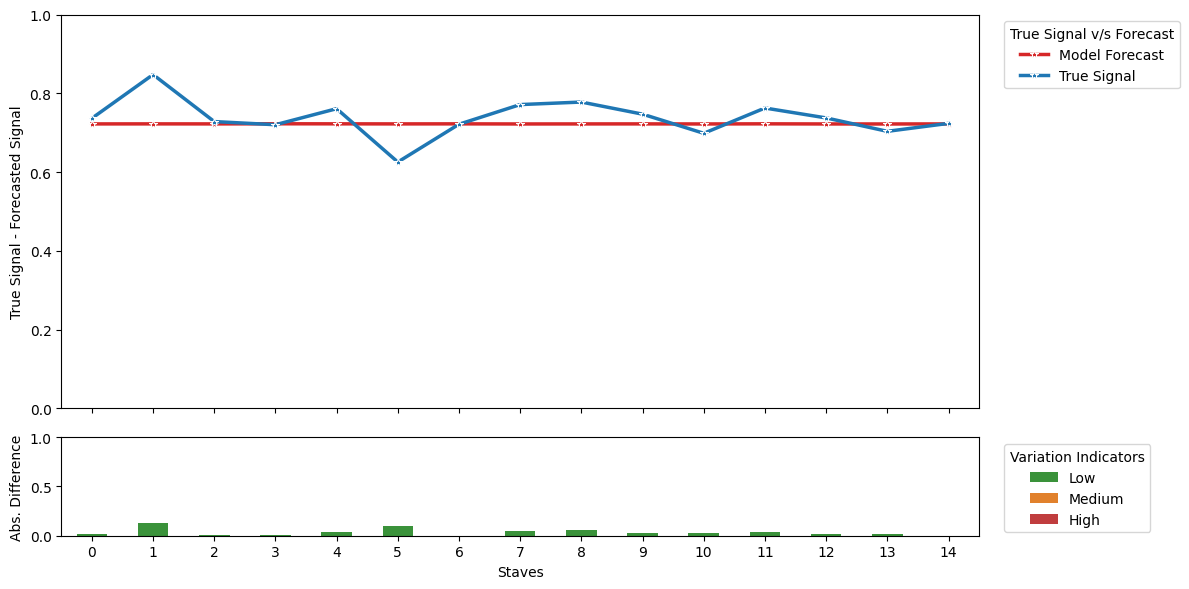

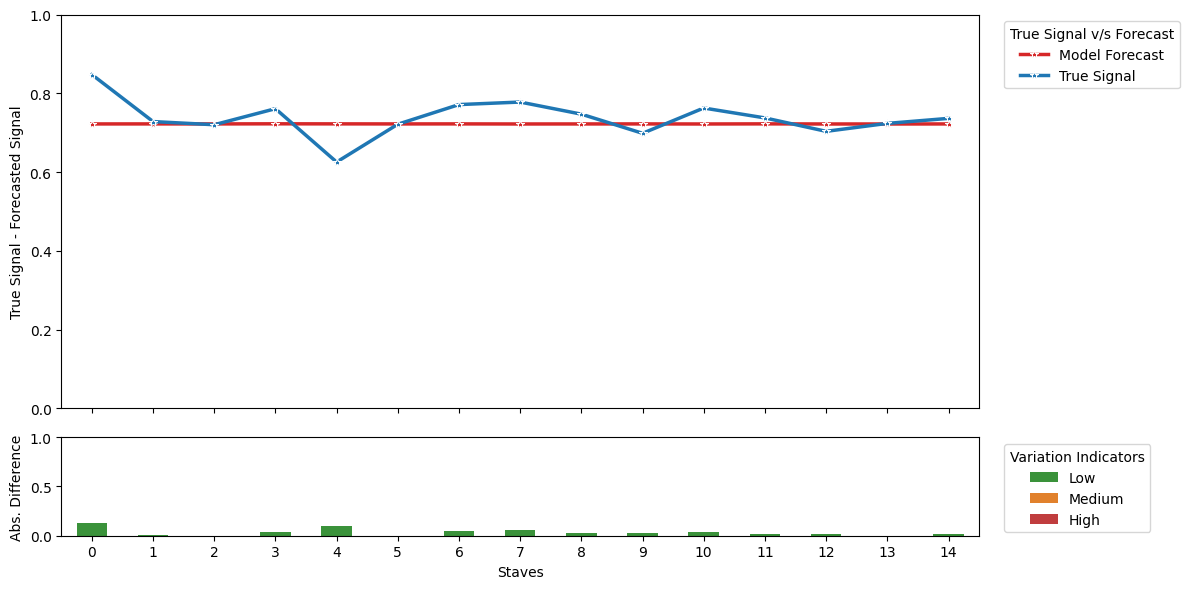

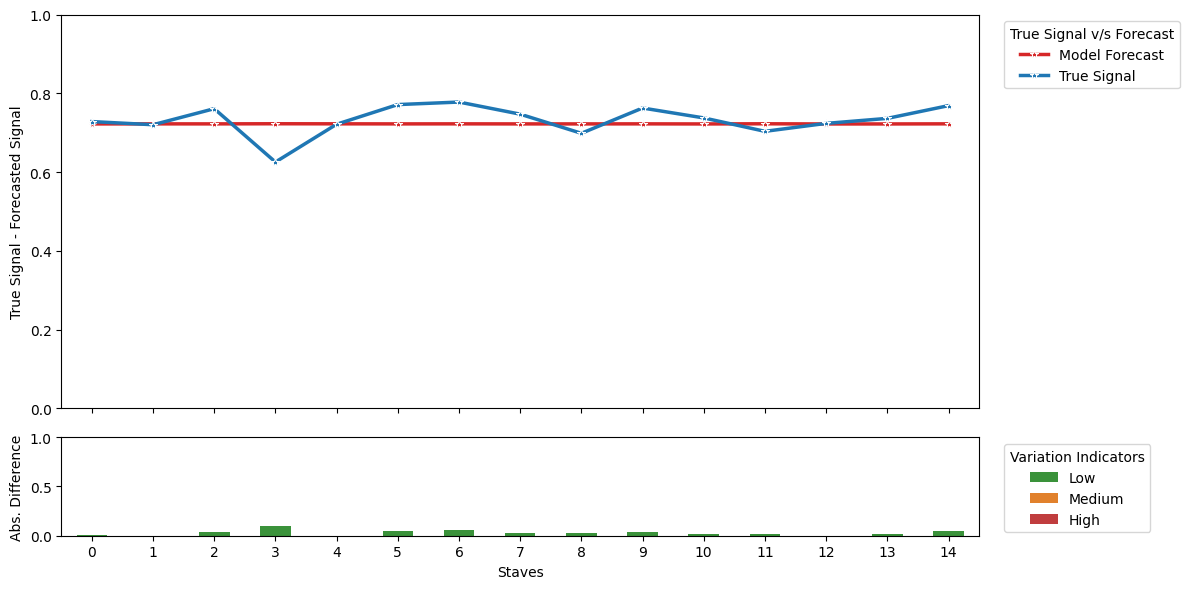

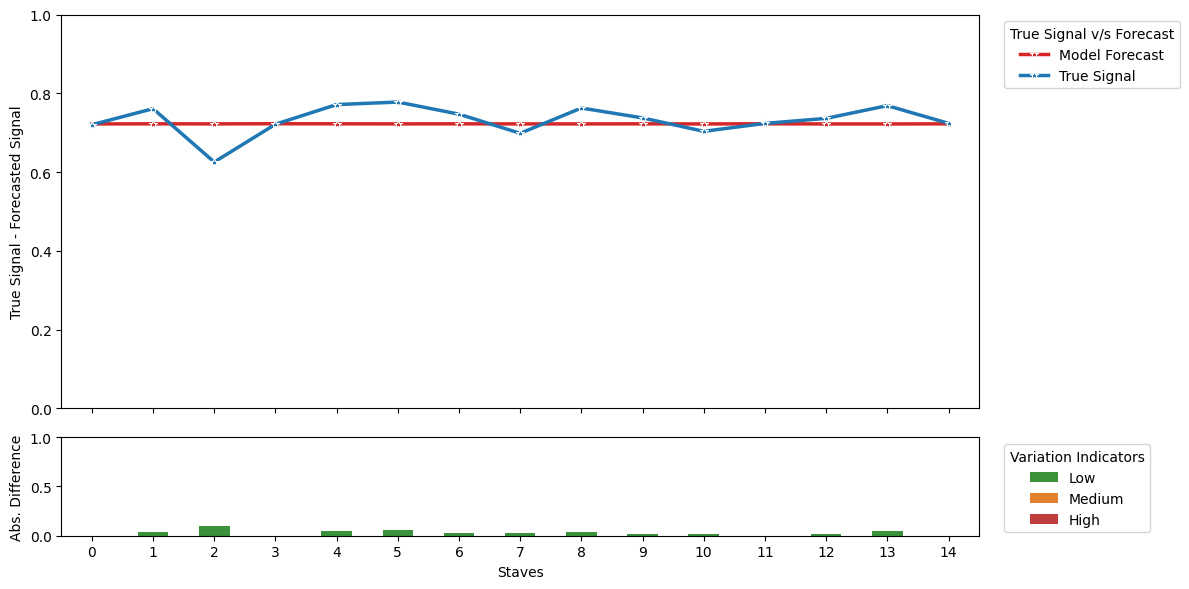

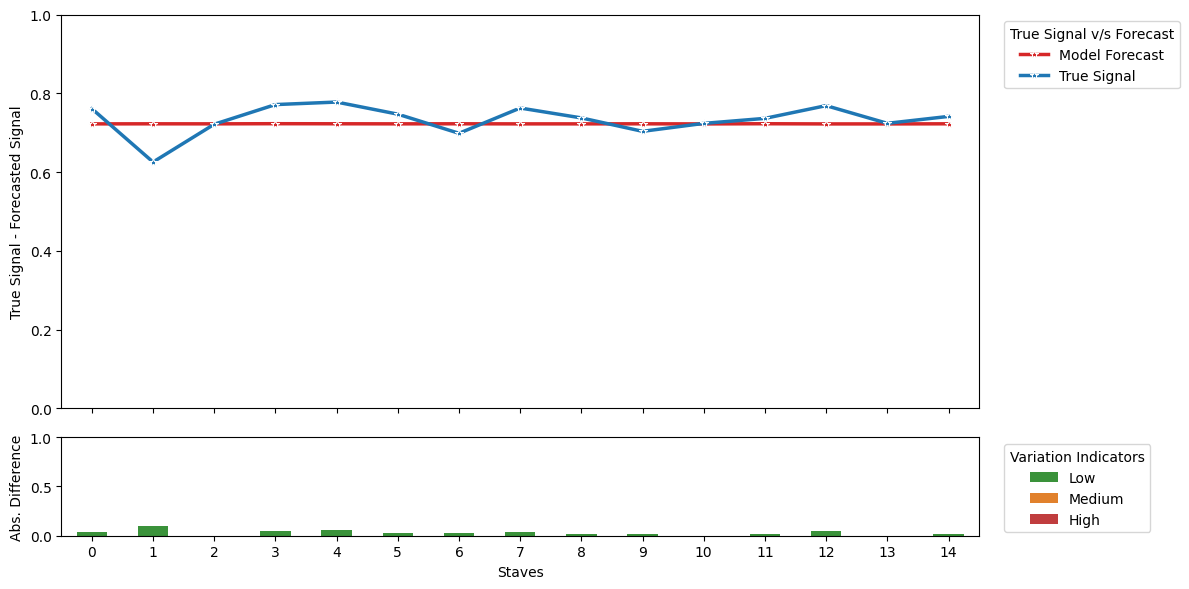

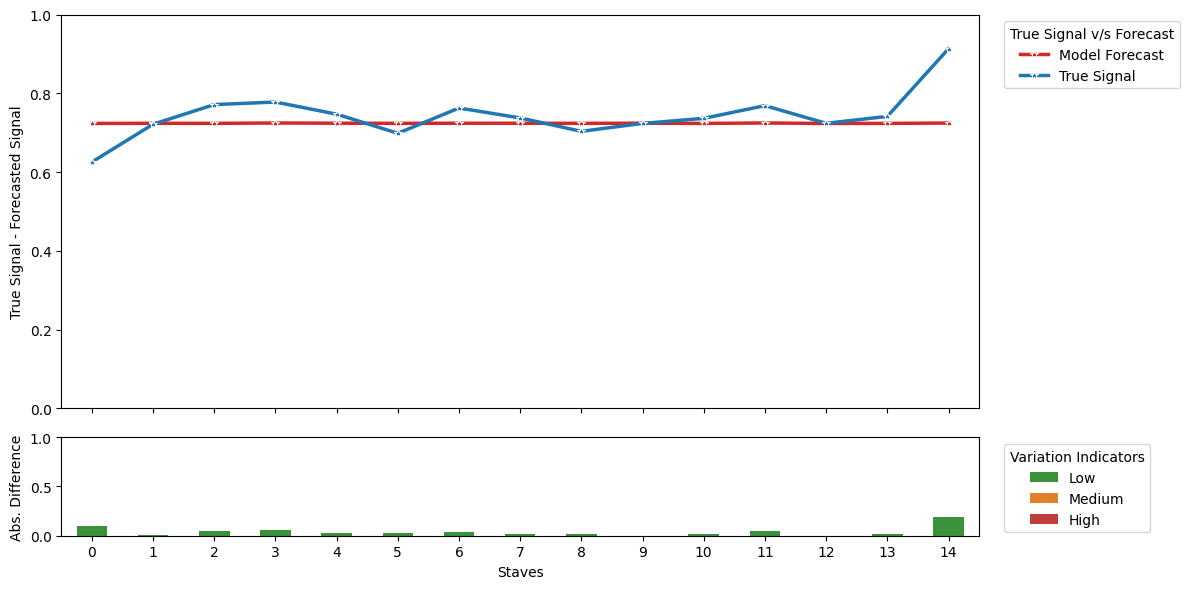

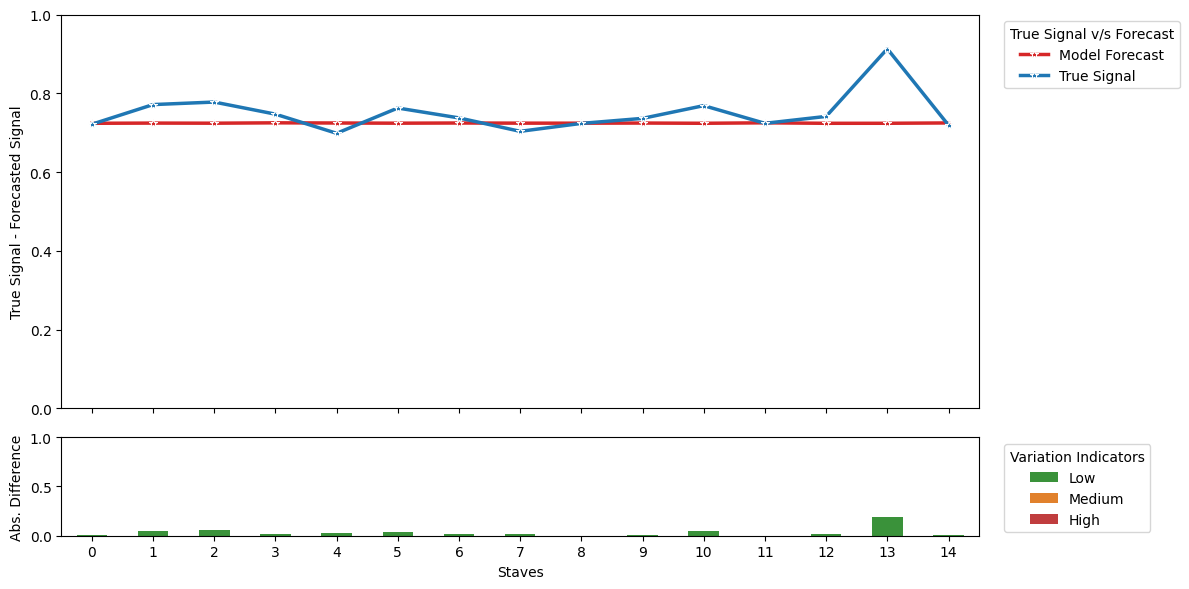

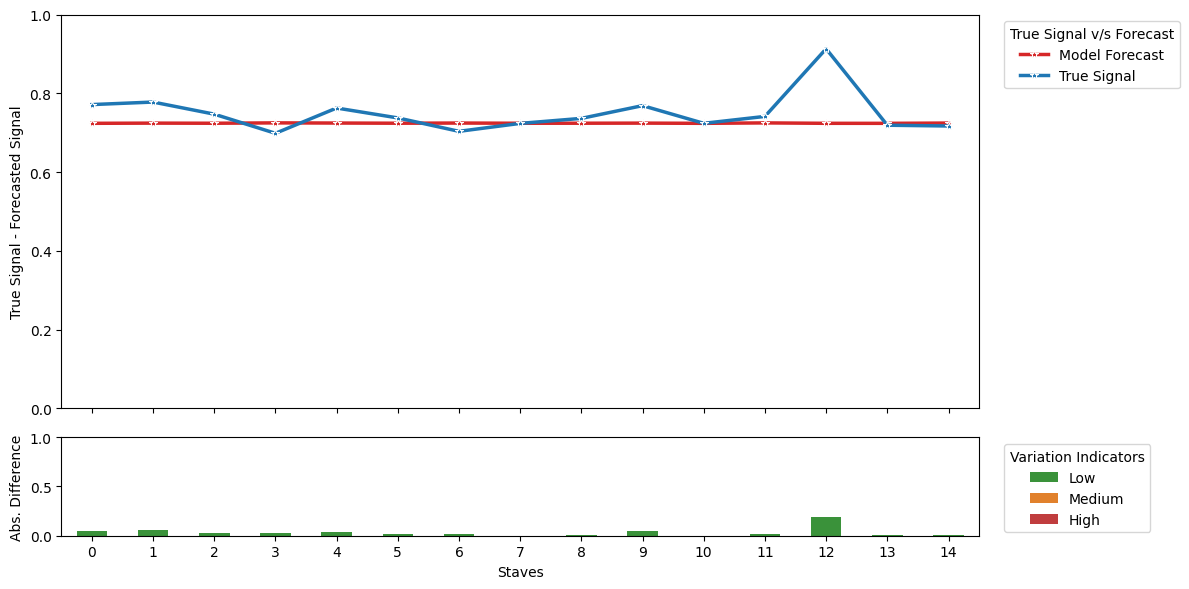

In [14]:
for i in range(10):
    # print(i)
    variation_plot(x_train[i],f'Misc/Plots/LSTM/{i}')